In [1]:
# DS Steps - collection - cleaning - Exploratory Data Analysis ( Behaviour of Data ) - Model Building - Model Deployement

In [3]:
import pandas as pd 
# (for rreading, analyzing, accessing data, exploratory data analysis)
import matplotlib.pyplot as plt
import seaborn as sns
# for data visualization

In [4]:
data = pd.read_csv('/home/deepankar/python-workspace/water_potability.csv')

In [4]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
#Data Cleaning - Missing value analysis two approaches, cleaning data, or filling the data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
data.fillna(data.mean(),inplace=True)  #Filling NUll values with mean

In [5]:
data


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [10]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

#Starting Exploratory Data Analysis

In [11]:
data.shape  #eows,columns

(3276, 10)

In [12]:
data.describe() #gives mean values

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


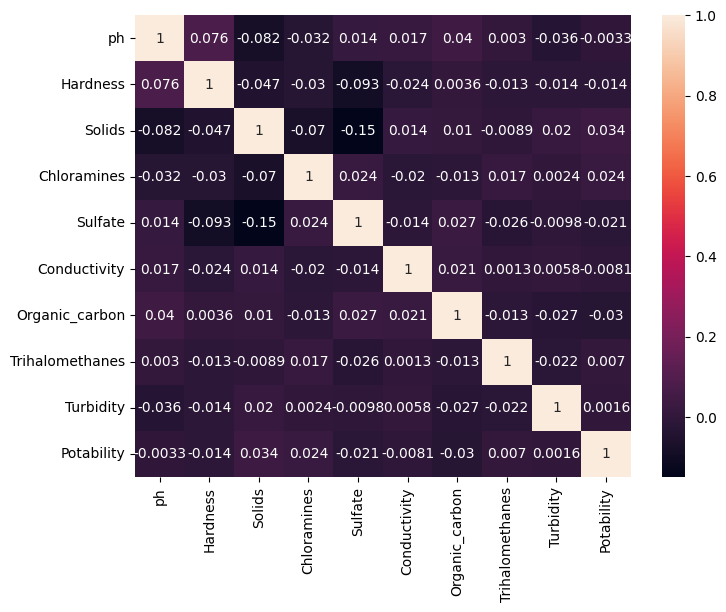

In [13]:
# for dimansionality reductionn  checking heatmap
sns.heatmap(data.corr(),annot=True)#annot writes numbers
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.show()

In [14]:
# in heatmaps we check column wise co-relation 
# if two parametres or features are co-relating, that means they are almost same,
# then they can be resuced to one

In [15]:
# outliers are values that are too far away from mean/

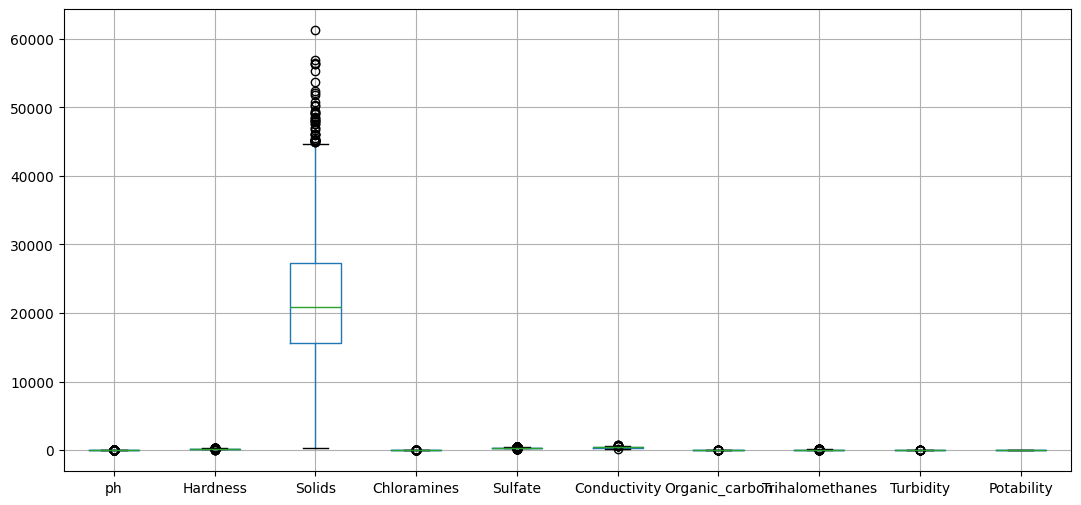

In [16]:
# /box plot
data.boxplot(figsize = (13,6))
plt.show()

In [17]:
data['Solids'].describe()

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64

In [18]:
# max : 61000 is way ahead of the mean value,/
# yes its normal to get a larger value or to remove it or you can also do expeiment 
# not removing outliers cause they may be important to determine quality of water

In [19]:
#MORE EDA

In [20]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [21]:
data['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [22]:
data.shape
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<Axes: xlabel='Potability'>

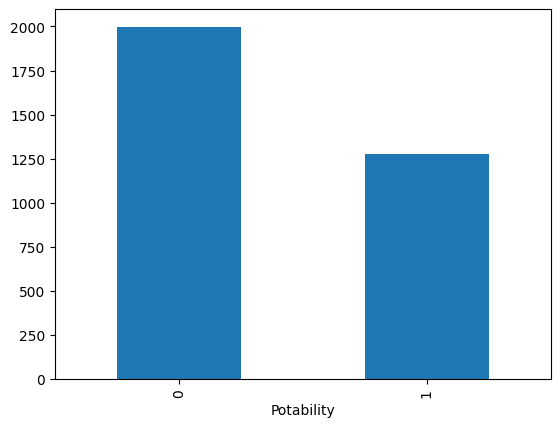

In [23]:
# checking the balance of the data, i.e how many are good water and how many are bad water
# if mor bad or good in data, the model will be biased
data['Potability'].value_counts().plot(kind = 'bar')

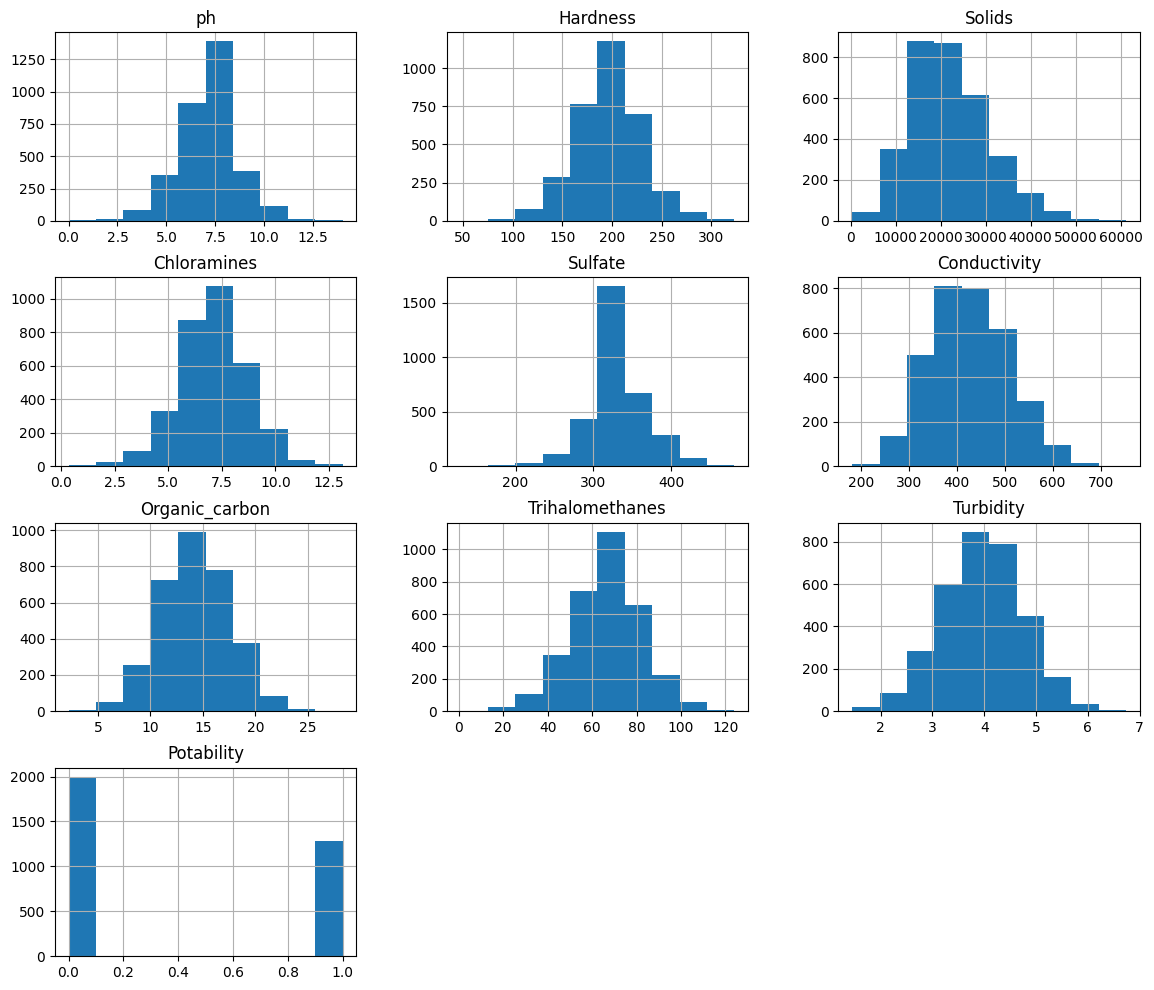

In [24]:
# checking how the data id distributed and nothing is biased/
data.hist(figsize=(14,12))
plt.show()

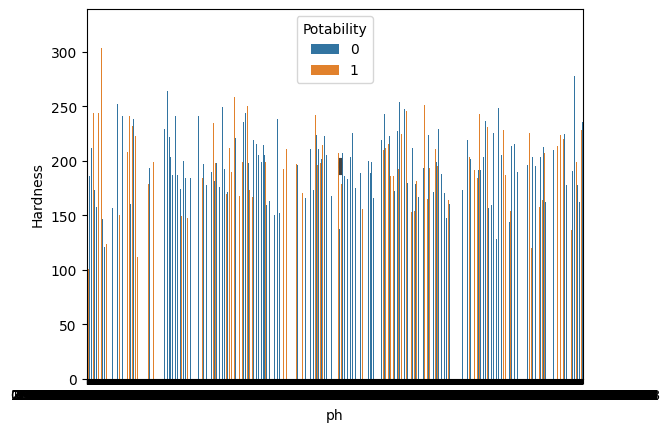

In [25]:
sns.barplot(x=data['ph'],y=data['Hardness'],hue=data['Potability'])
plt.show()

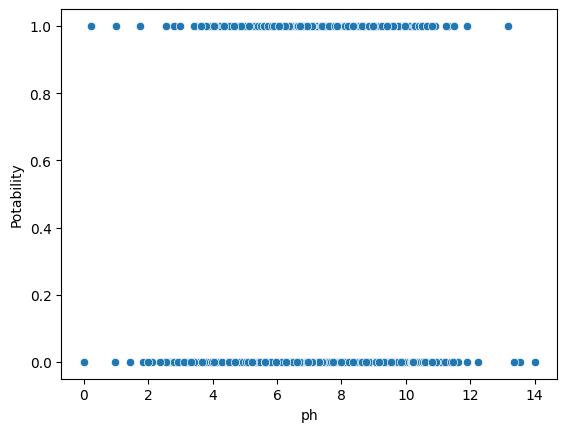

In [26]:
sns.scatterplot(x=data['ph'],y=data['Potability'])
plt.show()
# post - 13 ph the potability is bad. Most of the drinkable water is less than 12//

In [27]:
#Normalization

In [28]:
#Graphs are pretty normal so we dont need to do Normalization

In [29]:
#Partitioning - divinding data for training and testing

In [30]:
X = data.drop('Potability', axis=1) #Input Data
Y = data['Potability'] #Target Variable

In [31]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state = None)

In [34]:
# ---------------------------data preperation done-----------------------------------

In [35]:
# model training

In [36]:
#Descision Tree
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier()
# dt = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 8, splitter  = 'random')

In [37]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [38]:
X_test #(test data)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2577,7.766114,212.317666,24145.385762,7.925887,364.081412,464.108595,15.465256,70.105844,4.399902
2749,5.913133,184.393156,40847.760146,7.041828,331.959964,563.409970,21.917377,58.839203,3.900211
2868,13.541240,187.606792,13475.912773,6.756055,333.775777,411.264465,15.142667,74.448559,3.529191
2107,3.906568,152.818846,17857.716894,7.363060,324.382843,342.408791,7.637198,75.201346,3.204796
2002,7.035037,220.501888,19746.493251,7.059383,371.912615,536.183900,15.303433,67.901758,4.557029
...,...,...,...,...,...,...,...,...,...
406,4.725786,249.670999,20834.294278,5.036010,378.998684,411.114485,17.769641,78.817436,3.156331
222,7.735705,137.318166,16723.977244,7.675826,282.539892,595.329263,18.756139,63.042779,2.148612
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989
793,6.916826,210.860439,29263.554069,6.011611,252.231330,392.363586,12.892210,77.079780,4.598622


In [39]:
Y_test #( #Ground truth, what the potability value is absolute there )

2577    0
2749    1
2868    0
2107    0
2002    1
       ..
406     1
222     0
6       0
793     1
474     0
Name: Potability, Length: 656, dtype: int64

In [40]:
Y_prediction = dt.predict(X_test) # if the answer given bt dt also matches the ground truth then your model is working fine

In [41]:
# the grid does not match the given 2-d array ///
Y_prediction

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [43]:
#Accuracy score willl show us how many times the model has predicted the right values
#by comparing it with the ground truth.
accuracy_score(Y_prediction, Y_test)

0.5914634146341463

In [44]:
#Accuracy is not good rn

In [45]:
# Accuracy depends on Domain, in a self driving car 95% accuracy is bad, it should be 100
# but in psycology, 50% Accuracy is good as well.

In [46]:
confusion_matrix(Y_prediction, Y_test)

array([[265, 125],
       [143, 123]])

In [47]:
# tp fp
# tn fn
# true positive = the results are matching with Y-prediction
# false positive - 0,1
# true negative = 0,0
# flase negative = 1,0

In [48]:
#Model Optimization or Hyper Prameter tuning

In [49]:
#We play with the parameters for model

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

dt = DecisionTreeClassifier()
criterion = ["gini", "entropy"]
splitter = ["best","random"]
min_samples_split = range(1,10)

parameters = dict(criterion = criterion, splitter = splitter, min_samples_split = min_samples_split)
cv = RepeatedStratifiedKFold(n_splits = 5, random_state = 101)

grid_search_cv_dt = GridSearchCV(estimator=dt, param_grid = parameters, scoring = 'accuracy', cv = cv)

In [51]:
grid_search_cv_dt.fit(X_train, Y_train)


/home/deepankar/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
200 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/home/deepankar/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/deepankar/.local/lib/python3.10/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/deepankar/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/ho

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=101),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': range(1, 10),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [52]:
print(grid_search_cv_dt.best_params_)
#Gives the best set of parameters

{'criterion': 'entropy', 'min_samples_split': 9, 'splitter': 'random'}


In [53]:
prediction_grid = grid_search_cv_dt.predict(X_test)

In [54]:
accuracy_score(Y_test,prediction_grid)

0.5990853658536586

In [55]:
confusion_matrix(Y_test,prediction_grid)

array([[286, 122],
       [141, 107]])

In [56]:
dt.fit(X_train, Y_train)
X_DT=dt.predict([[8.289858,222.483931,23884.131479,5.533208,354.959330,514.733083,11.205533,57.313680,4.289237]])

/home/deepankar/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [57]:
X_DT

array([1])

In [58]:
X_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2577,7.766114,212.317666,24145.385762,7.925887,364.081412,464.108595,15.465256,70.105844,4.399902
2749,5.913133,184.393156,40847.760146,7.041828,331.959964,563.409970,21.917377,58.839203,3.900211
2868,13.541240,187.606792,13475.912773,6.756055,333.775777,411.264465,15.142667,74.448559,3.529191
2107,3.906568,152.818846,17857.716894,7.363060,324.382843,342.408791,7.637198,75.201346,3.204796
2002,7.035037,220.501888,19746.493251,7.059383,371.912615,536.183900,15.303433,67.901758,4.557029
...,...,...,...,...,...,...,...,...,...
406,4.725786,249.670999,20834.294278,5.036010,378.998684,411.114485,17.769641,78.817436,3.156331
222,7.735705,137.318166,16723.977244,7.675826,282.539892,595.329263,18.756139,63.042779,2.148612
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989
793,6.916826,210.860439,29263.554069,6.011611,252.231330,392.363586,12.892210,77.079780,4.598622


In [59]:
Y_test


2577    0
2749    1
2868    0
2107    0
2002    1
       ..
406     1
222     0
6       0
793     1
474     0
Name: Potability, Length: 656, dtype: int64

In [60]:
#KNN 

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=28,weights='uniform')
knn.fit(X_train,Y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=28)

In [63]:
prediction_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(Y_test,prediction_knn)*100
print('accuracy_score score    :',accuracy_score(Y_test,prediction_knn)*100,'%')

accuracy_score score    : 60.36585365853659 %


Knn hpt

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 31)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
grid_search_knn = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_search_knn.fit(X_train, Y_train)

# summarize results
print(f"Best: {grid_search_knn.best_score_:.3f} using {grid_search_knn.best_params_}")
means = grid_search_knn.cv_results_['mean_test_score']
stds = grid_search_knn.cv_results_['std_test_score']
params = grid_search_knn.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Best: 0.599 using {'metric': 'euclidean', 'n_neighbors': 26, 'weights': 'uniform'}
0.527 (0.026) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.527 (0.026) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.580 (0.024) with: {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
0.527 (0.026) with: {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
0.552 (0.034) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.552 (0.035) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.578 (0.025) with: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
0.550 (0.026) with: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.553 (0.024) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.558 (0.023) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.580 (0.021) with: {'metric': 'euclidean', 'n_neighbors': 6, 'weights':

In [65]:
#Using Pipeline to calculate accuracies over all models

In [66]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)
X_scaled

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import AdaBoostClassifier

In [68]:
LR = LogisticRegression()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
ETC = ExtraTreesClassifier()
SVM = SVC()
KNN = KNeighborsClassifier()
GBC = GradientBoostingClassifier()
ABC = AdaBoostClassifier()
NB = GaussianNB()

In [69]:
from sklearn.model_selection import cross_val_score

In [70]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), 
          ExtraTreesClassifier(), SVC(), KNeighborsClassifier(), 
          GradientBoostingClassifier(), AdaBoostClassifier(), GaussianNB()]

features = X_scaled
labels = data['Potability']
CV = 5
accu_list = []  # Accuracy List
ModelName = []  # Model Name List

for model in models:
    model_name = model.__class__.__name__  # name of the model
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    accu_list.append(accuracies.mean() * 100)
    ModelName.append(model_name)

model_acc_df = pd.DataFrame({"Model": ModelName, "Cross_Val_Accuracy": accu_list})
print(model_acc_df)

/home/deepankar/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/deepankar/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/deepankar/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/deepankar/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this wa

                        Model  Cross_Val_Accuracy
0          LogisticRegression           61.019549
1      DecisionTreeClassifier           58.578291
2      RandomForestClassifier           63.462391
3        ExtraTreesClassifier           64.927341
4                         SVC           65.080339
5        KNeighborsClassifier           59.340579
6  GradientBoostingClassifier           61.844722
7          AdaBoostClassifier           59.249488
8                  GaussianNB           61.263871


In [94]:
#SVC
from sklearn.svm import SVC
SVC = SVC(C=1000,gamma='scale')
SVC.fit(X_train,Y_train)

SVC(C=1000)

In [95]:
prediction_svc = SVC.predict(X_test)
accuracy_svc = accuracy_score(Y_test,prediction_svc)*100
print('accuracy_score score    :',accuracy_score(Y_test,prediction_svc)*100,'%')

accuracy_score score    : 62.34756097560976 %


In [96]:
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define model and parameters
model = SVC()
C_values = [0.1, 1, 10, 100, 1000]  # regularization parameter
gamma_values = ['scale', 'auto']  # kernel coefficient

# define grid search
grid = {'C': C_values, 'gamma': gamma_values}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
grid_search_svc = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_search_svc.fit(X_train, Y_train)

# summarize results
print(f"Best: {grid_search_svc.best_score_:.3f} using {grid_search_svc.best_params_}")
means = grid_search_svc.cv_results_['mean_test_score']
stds = grid_search_svc.cv_results_['std_test_score']
params = grid_search_svc.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")


Best: 0.607 using {'C': 0.1, 'gamma': 'scale'}
0.607 (0.000) with: {'C': 0.1, 'gamma': 'scale'}
0.607 (0.000) with: {'C': 0.1, 'gamma': 'auto'}
0.607 (0.000) with: {'C': 1, 'gamma': 'scale'}
0.607 (0.000) with: {'C': 1, 'gamma': 'auto'}
0.606 (0.002) with: {'C': 10, 'gamma': 'scale'}
0.607 (0.000) with: {'C': 10, 'gamma': 'auto'}
0.606 (0.002) with: {'C': 100, 'gamma': 'scale'}
0.607 (0.000) with: {'C': 100, 'gamma': 'auto'}
0.606 (0.004) with: {'C': 1000, 'gamma': 'scale'}
0.607 (0.000) with: {'C': 1000, 'gamma': 'auto'}


The final part of prediction

In [97]:
X_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2577,7.766114,212.317666,24145.385762,7.925887,364.081412,464.108595,15.465256,70.105844,4.399902
2749,5.913133,184.393156,40847.760146,7.041828,331.959964,563.409970,21.917377,58.839203,3.900211
2868,13.541240,187.606792,13475.912773,6.756055,333.775777,411.264465,15.142667,74.448559,3.529191
2107,3.906568,152.818846,17857.716894,7.363060,324.382843,342.408791,7.637198,75.201346,3.204796
2002,7.035037,220.501888,19746.493251,7.059383,371.912615,536.183900,15.303433,67.901758,4.557029
...,...,...,...,...,...,...,...,...,...
406,4.725786,249.670999,20834.294278,5.036010,378.998684,411.114485,17.769641,78.817436,3.156331
222,7.735705,137.318166,16723.977244,7.675826,282.539892,595.329263,18.756139,63.042779,2.148612
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989
793,6.916826,210.860439,29263.554069,6.011611,252.231330,392.363586,12.892210,77.079780,4.598622


In [98]:
Y_test

2577    0
2749    1
2868    0
2107    0
2002    1
       ..
406     1
222     0
6       0
793     1
474     0
Name: Potability, Length: 656, dtype: int64

In [107]:
def convert_to_comma_separated(input_string):
    # Split the input string by spaces
    values = input_string.split()

    # Join the values with commas
    output_string = ','.join(values)

    return output_string

# Example usage
input_string = input('Enter String')
output_string = convert_to_comma_separated(input_string)
print("Output:", output_string)

Enter String 13.541240	187.606792	13475.912773	6.756055	333.775777	411.264465	15.142667	74.448559	3.529191


Output: 13.541240,187.606792,13475.912773,6.756055,333.775777,411.264465,15.142667,74.448559,3.529191


In [108]:
from sklearn.svm import SVC

# Instantiate the SVC model
SVC_model = SVC(C=1000,gamma='scale')
SVC_model.fit(X_train,Y_train)

# Define your input data as a 2D array
input_data = [[13.541240,187.606792,13475.912773,6.756055,333.775777,411.264465,15.142667,74.448559,3.529191]]

# Call the predict method with the input data using the correct object
predictions = SVC_model.predict(input_data)

# Now you can use the 'predictions' variable which contains the predicted values


/home/deepankar/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [111]:
print('Potability: ',predictions)

Potability:  [0]


In [112]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [2]:

data()


NameError: name 'data' is not defined